# Facebook Ads and Sales Conversion

What can we learn from a KNN cluster analysis about an anonymous organization's (Company XYZ) ad campaign? What will this tell us about its sales conversions?
____________________________________________________________________________________________________________________________________________________________
PURPOSE AND CONTENT

This project's aim is to garner a deeper understanding of the anonymous company's Facebook ads based on customer demographics, impressions, clicks, and sales conversion. More specifically, what qualities and trends correlate with conversions? To answer this question and more, an exploratory analysis and a KNN classification model will be conducted on the dataset.

1.) ad_id: the unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of Company XYZ.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by Company XYZ to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [2]:
data = pd.read_csv("KAG_conversion_data.csv")
df = data
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Data Preprocessing

In [3]:
# Determine categories in 'xyz_campaign_id' variable:
data['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

#### Convert variables to approprate formats 

In [4]:
data['xyz_campaign_id'] = (data['xyz_campaign_id']).astype('category')
data["xyz_campaign_id"].replace({916:"campaign_X",936:"campaign_Y",1178:"campaign_Z"}, inplace=True)

In [5]:
# determine categories in 'age' variable:
data['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [6]:
# recode 'age' into numeric 'average age'
def mean_age (series):
    if series == '30-34':
        return 32
    if series == '35-39':
        return 37
    if series == '40-44':
        return 42
    if series == '45-49':
        return 47
data['ageR'] = data['age'].apply(mean_age)
data.head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageR
0,708746,campaign_X,103916,30-34,M,15,7350,1,1.43,2,1,32


In [7]:
data['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106], dtype=int64)

#### Remove NA's and subset the data to only the variables needed

In [8]:
data = data.dropna()
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageR
0,708746,campaign_X,103916,30-34,M,15,7350,1,1.43,2,1,32
1,708749,campaign_X,103917,30-34,M,16,17861,2,1.82,2,0,32
2,708771,campaign_X,103920,30-34,M,20,693,0,0.00,1,0,32
3,708815,campaign_X,103928,30-34,M,28,4259,1,1.25,1,0,32
4,708818,campaign_X,103928,30-34,M,28,4133,1,1.29,1,1,32


## Exploratory Analysis

In [9]:
data.describe()

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageR
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007,38.321085
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708,5.903868
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,32.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,32.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,37.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,42.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,47.000000


<AxesSubplot:>

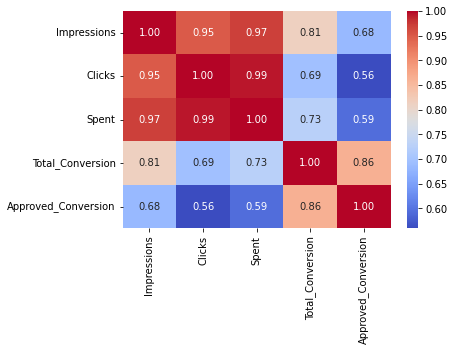

In [10]:
sns.heatmap(data[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

#### Key Observations:

- Impressions correlate highly with clicks and with amount spent
    
- Clicks correlate highly with amount spent
    
- individual sales correlate highly with impressions

## Numeric Data Distributions

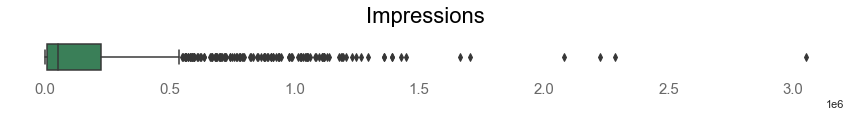

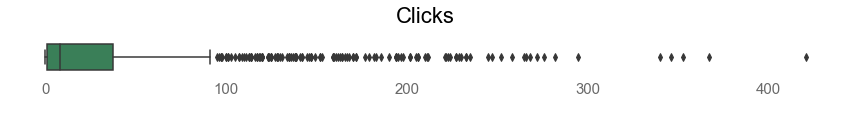

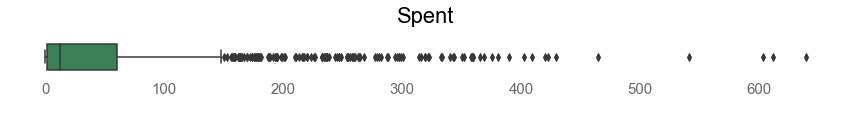

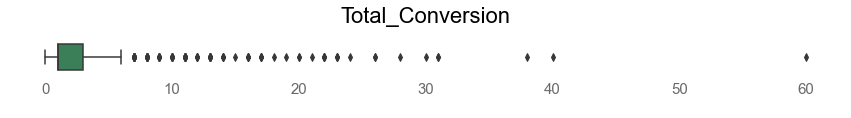

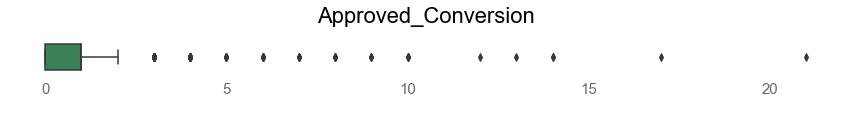

In [11]:
# Subset to numeric data
data2 = data[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']]
# Create a function to graph them on a boxplot. 
for column in data2:
        plt.figure(figsize=(15,.6))
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
        sns.set_palette("colorblind")
        sns.boxplot(data=data2, x=column, color = 'seagreen')
        # format boxplots
        plt.title(column, pad = 18, color = 'black', size = 22)
        plt.xticks(color = 'dimgrey', size = 15)
        plt.xlabel(column, color = 'white')

## Relationships 

Text(0.5, 0.95, 'Feature Relationships')

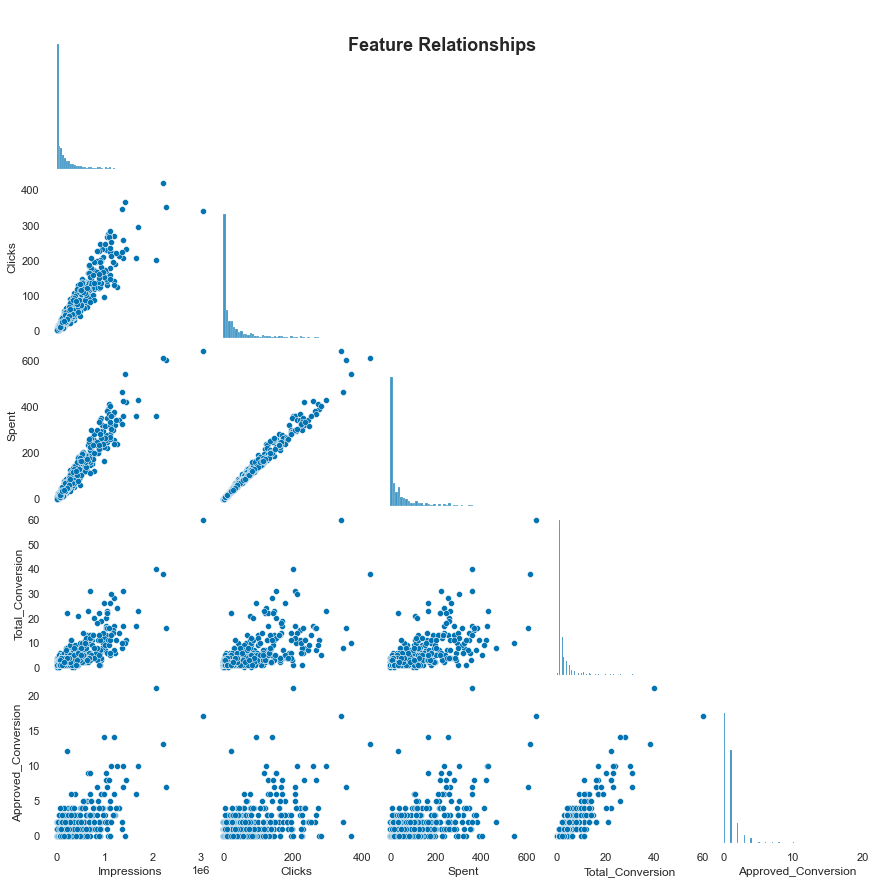

In [12]:
data3 = data[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion', 'gender','age','xyz_campaign_id']]
sns.pairplot(data3, corner=True)
plt.suptitle("Feature Relationships", x=0.5 ,y=0.95, size=18, weight='bold')

Notice direct relationships between the amount Company XYZ spends on an advertisement and the associated number of clicks, impressions, inquiries (total_conversions) and approved conversions. Spending more on an ad results in higher incidences of all of these features. Below, these feature relationships are broken down according to age group and according to gender.

Text(0.5, 0.95, 'Feature Relationships by Age Group')

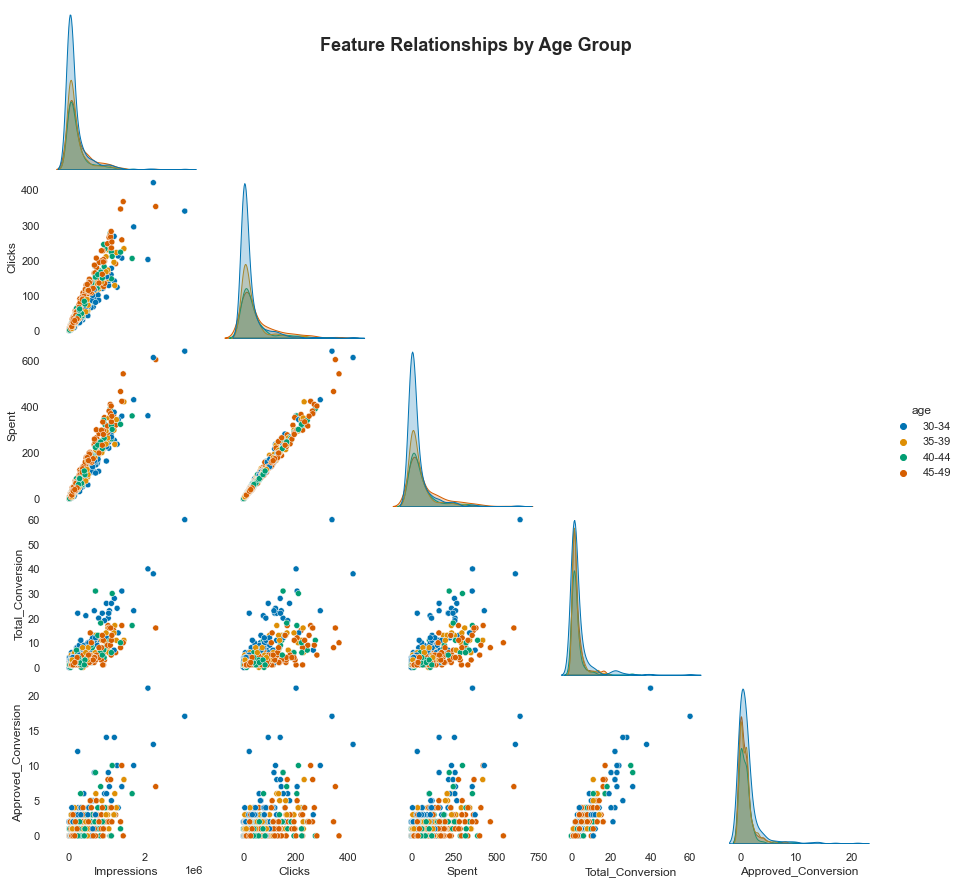

In [13]:
data3 = data[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion', 'gender','age','xyz_campaign_id']]
sns.pairplot(data3, corner=True, hue = 'age')
plt.suptitle("Feature Relationships by Age Group", x=0.5 ,y=0.95, size=18, weight='bold')

Text(0.5, 0.95, 'Feature Relationships by Gender')

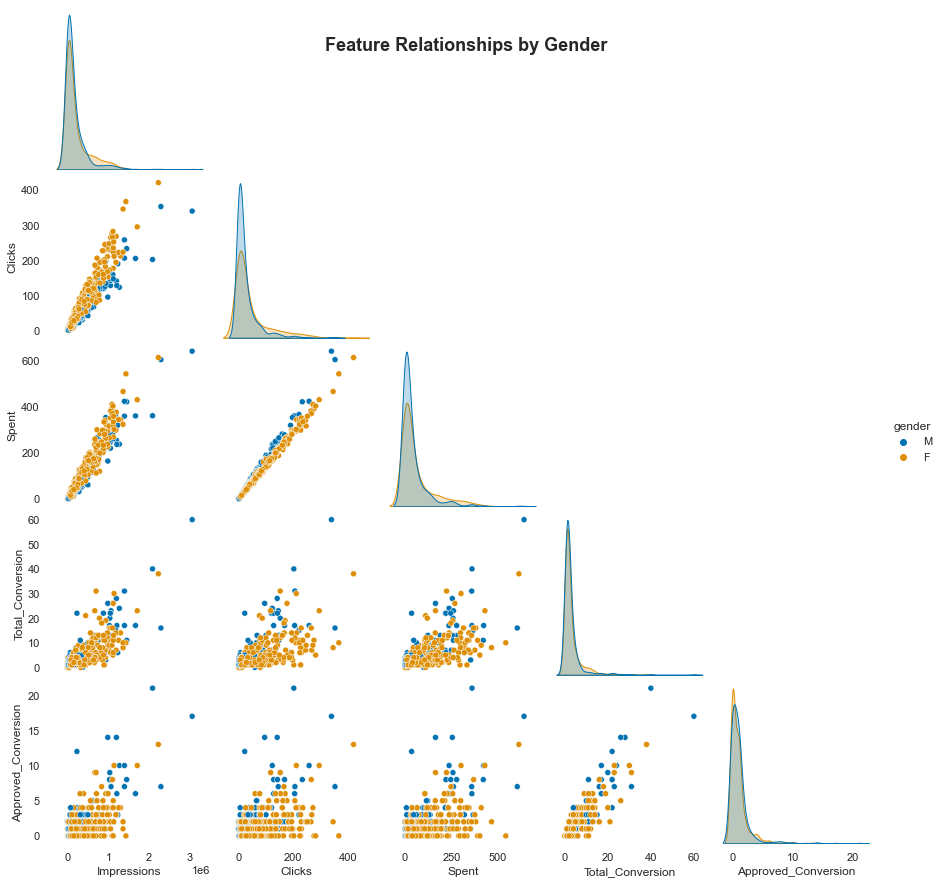

In [14]:
sns.pairplot(data3, corner=True, hue='gender')
plt.suptitle("Feature Relationships by Gender", x=0.5 ,y=0.95, size=18, weight='bold')

## Campaign Efficacy

In [15]:
# Calculate customer acquisition cost and append to dataset
data['cac'] = data['Spent']/data['Approved_Conversion']

In [41]:
# Find unique number of approved conversions
data['Approved_Conversion'].unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13],
      dtype=int64)

Approved Conversions Count

<AxesSubplot:xlabel='Approved_Conversion', ylabel='count'>

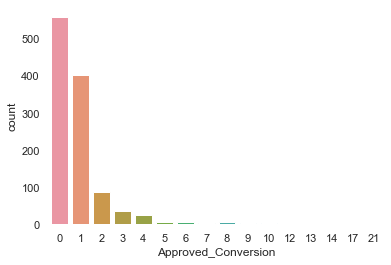

In [130]:
sns.countplot(x ='Approved_Conversion', data = data)

In [47]:
# convert approved_conversion to binary. 0's for no conversion. 1's for at least 1 conversion
campaignEfficacy = data.copy()
as.factor(campaignEfficacy[['Approved_Conversion']]

In [51]:
# convert approved_conversion to 0's and 1's
def success (series):
    if series > 0 :
        return 1
    else:
        return 0
campaignEfficacy['approvedConverionR'] = campaignEfficacy['Approved_Conversion'].apply(success)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageR,cac,genderR,approvedConverionR
0,708746,campaign_X,103916,30-34,M,15,7350,1,1.43,2,1,32,1.43,0,1
1,708749,campaign_X,103917,30-34,M,16,17861,2,1.82,2,0,32,inf,0,0
2,708771,campaign_X,103920,30-34,M,20,693,0,0.00,1,0,32,NaN,0,0
3,708815,campaign_X,103928,30-34,M,28,4259,1,1.25,1,0,32,inf,0,0
4,708818,campaign_X,103928,30-34,M,28,4133,1,1.29,1,1,32,1.29,0,1


In [54]:
# remove all zeros to focus on the ads resulting in successes-
campaignEfficacy1 = campaignEfficacy[campaignEfficacy['Approved_Conversion']>0]

In [66]:
# success = # approved conversions / impressions
campaignEfficacy1['impressionSuccessRate'] = 100*(campaignEfficacy1['Approved_Conversion']/campaignEfficacy1['Impressions'])

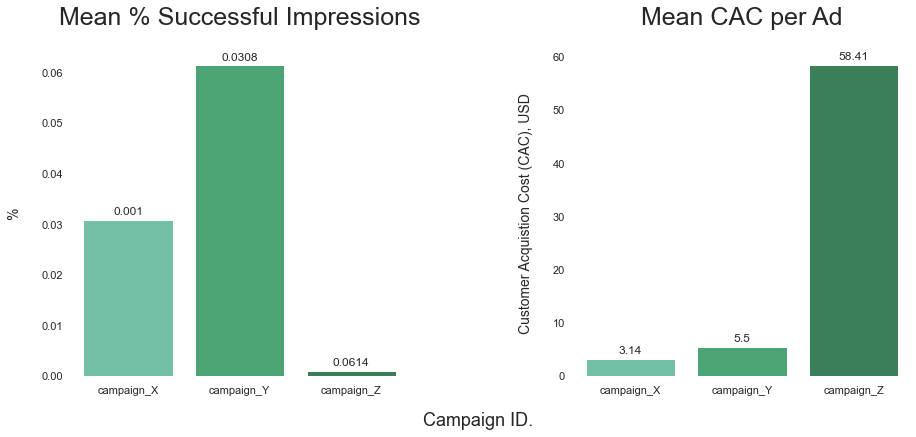

In [135]:
#med_spending_age = data.groupby('age')['Spent'].median().sort_values().reset_index()

mean_impressionSuccessRate = campaignEfficacy1.groupby('xyz_campaign_id')['impressionSuccessRate'].mean().sort_values().reset_index()
mean_cac = campaignEfficacy1.groupby('xyz_campaign_id')['cac'].mean().sort_values().reset_index()

fig, axes = plt.subplots(1,2, figsize=[15,6], constrained_layout=True)
plt.subplots_adjust(wspace = 0.5, hspace=0.8)

# First plot
ax = sns.barplot(ax = axes[0], data=mean_impressionSuccessRate, x='xyz_campaign_id', y='impressionSuccessRate', palette=['mediumaquamarine','mediumseagreen','seagreen'])
ax.set_title('Mean % Successful Impressions', size = 25, pad = 25)

ax.set_xlabel("",size = 12, labelpad = 20)
ax.set_ylabel('%', labelpad = 20, size = 14)

i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height + 0.001,
        round(mean_impressionSuccessRate['impressionSuccessRate'][i], 4),ha="center")
    i += 1
    
# Second plot
ax2 = sns.barplot(ax = axes[1], data=mean_cac, x='xyz_campaign_id', y='cac', palette=['mediumaquamarine','mediumseagreen','seagreen'])
ax2.set_title('Mean CAC per Ad', size = 25, pad = 25)

ax2.set_xlabel("",size = 12, labelpad = 20)
ax2.set_ylabel('Customer Acquistion Cost (CAC), USD', size = 14, labelpad = 20)

# caption
txt="Campaign ID."
plt.figtext(0.45, 0.01, txt, wrap=True, horizontalalignment='left', fontsize=18)


i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 1,
        (round(mean_cac['cac'][i],2)),ha="center")
    i += 1

##### Successful Impressions
- Found by dividing each ad's successful impressions by the associated number of approved conversions. Chart shows the average rate for each campaign.

##### Customer Acquisition Cost
- Amount spent by Company XYZ per advertisement that produced at least 1 approved conversion, grouped by campaign ID.

## Spending

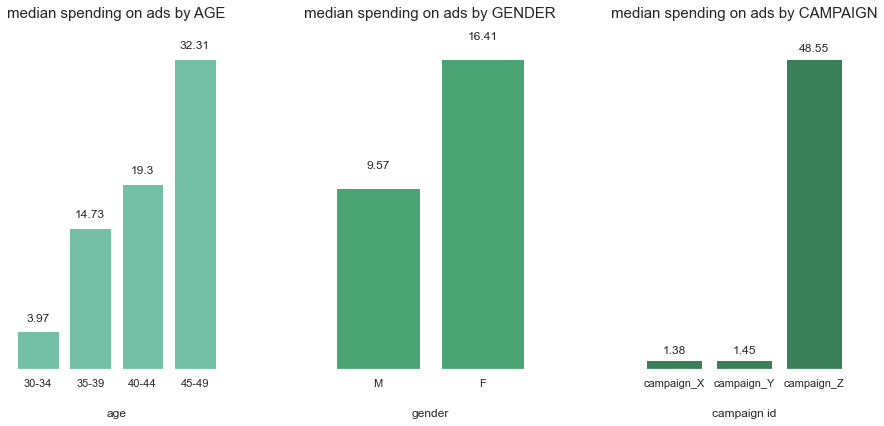

In [26]:
med_spending_age = data.groupby('age')['Spent'].median().sort_values().reset_index()
med_spending_gender = data.groupby('gender')['Spent'].median().sort_values().reset_index()
med_spending_xyz = data.groupby('xyz_campaign_id')['Spent'].median().sort_values().reset_index()

fig, axes = plt.subplots(1,3, figsize=[15,6], constrained_layout=True)
plt.subplots_adjust(wspace = 0.5, hspace=0.8)

# First plot
ax = sns.barplot(ax = axes[0], data=med_spending_age, x='age', y='Spent',color = 'mediumaquamarine')
ax.set_title('median spending on ads by AGE', size = 15, pad = 25)
ax.set_yticks([])
ax.set_xlabel("age",size = 12, labelpad = 20)
ax.set_ylabel('')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,
        round(med_spending_age['Spent'][i], 2),ha="center")
    i += 1

# Second plot
ax1 = sns.barplot(ax = axes[1], data=med_spending_gender, x='gender', y='Spent',color = 'mediumseagreen')
ax1.set_title('median spending on ads by GENDER', size = 15, pad = 25)
ax1.set_yticks([])
ax1.set_xlabel("gender",size = 12, labelpad = 20)
ax1.set_ylabel('')
i = 0
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 1,
        round(med_spending_gender['Spent'][i], 2),ha="center")
    i += 1

# Third plot
ax2 = sns.barplot(ax = axes[2], data=med_spending_xyz, x='xyz_campaign_id', y='Spent', color = 'seagreen')
ax2.set_title('median spending on ads by CAMPAIGN', size = 15, pad = 25)
ax2.set_yticks([])
ax2.set_xlabel("campaign id",size = 12, labelpad = 20)
ax2.set_ylabel('')
i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 1,
        round(med_spending_xyz['Spent'][i], 2),ha="center")
    i += 1

Campaign Y holds greater popularity among females. Campaign X and Campaign Z appeal more to males.

## Interest

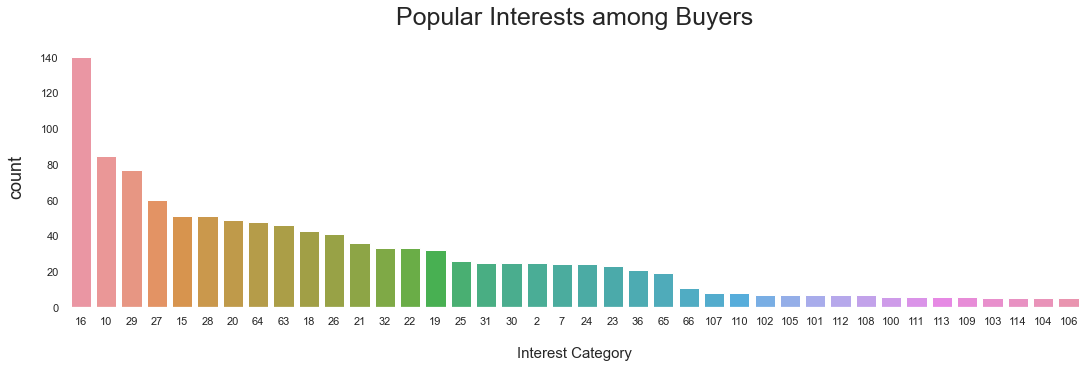

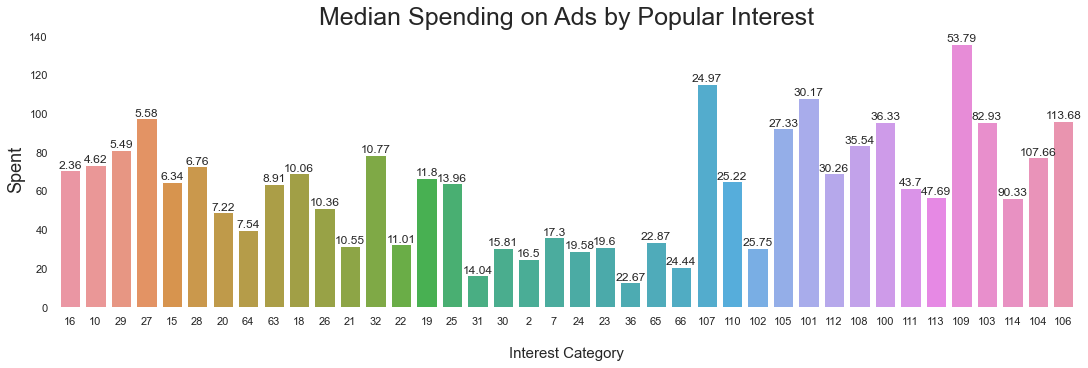

In [27]:
#fig, axes = plt.subplots(2,1, figsize=[32,6], constrained_layout=True)
#plt.subplots_adjust(wspace = 0.5, hspace=0.8)
fig, axes = plt.subplots(1,1, figsize=[15,5], constrained_layout=True)

# count plot on single categorical variable 

ax = sns.countplot(x ='interest', data = data, order=data['interest'].value_counts().index)
ax.set_title("Popular Interests among Buyers", size = 25, pad = 20)
ax.set_xlabel("Interest Category", size = 15, labelpad = 20)
ax.set_ylabel("count", size = 18, labelpad = 15)

# sort a subset of the data according to median spent and grouped by interest 
med_spending_interest = data.groupby('interest')['Spent'].median().sort_values().reset_index()

# First Plot
# Hide spines (black border of the plot)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

avg_spending_topic = data.groupby(['interest','Spent']).mean().reset_index()

fig, axes = plt.subplots(1,1, figsize=[15,5], constrained_layout=True)

# Second plot
ax2 = sns.barplot(ax = axes, data=avg_spending_topic, x='interest', y='Spent',order=data['interest'].value_counts().index, ci = None)
ax2.set_title('Median Spending on Ads by Popular Interest', size = 25)
ax2.set_xlabel("Interest Category", size = 15, labelpad = 20)
ax2.set_ylabel("Spent", size = 18)

i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 1,
        round(med_spending_interest['Spent'][i], 2),ha="center")
    i += 1

Interest categories 107 and beyond represent overspending on the part of Company XYZ, given those categories' preference among buyers. 

## Amount Spent

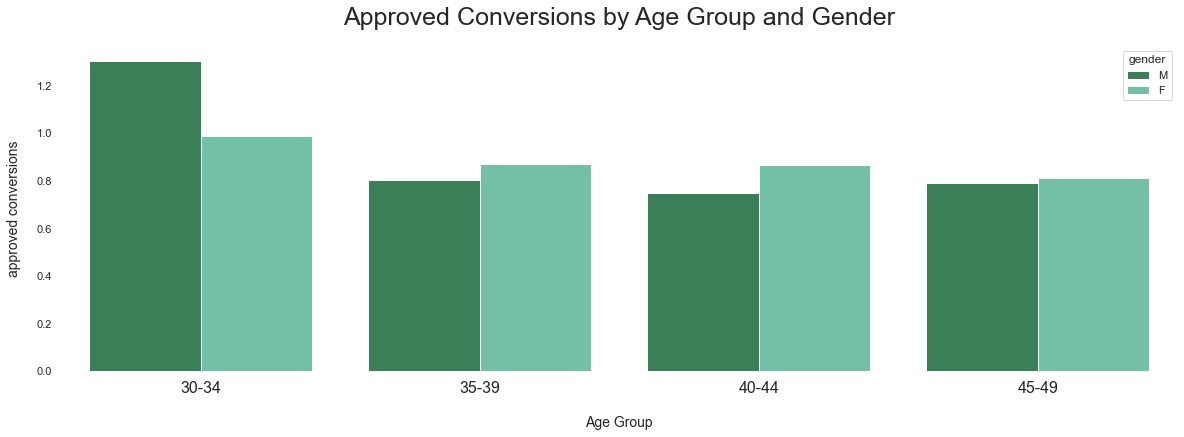

In [134]:
# count plot on single categorical variable 
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = 'Approved_Conversion', x = 'age', data = data, ci = None, hue = 'gender',  palette=['seagreen', 'mediumaquamarine'])
plt.title("Approved Conversions by Age Group and Gender", size = 25, pad = 20)
plt.xlabel("Age Group", size = 14, labelpad = 20)
plt.ylabel("approved conversions", size = 14, labelpad = 15)
plt.xticks(size = 16)
# Show the plot 
plt.show() 

## Quick takeaways
- campaign Z has the greatest efficacy (customer acquistion cost / amount spent to display the ad)
- Campaign Y is more popular with females. Campaigns X and Z with males
- Females make more purchases than males for each age range. 
- 30- to 34-year-olds make more purchases than any other age group.
- The top three interest categories (listed greatest to least) are 16, 10 and 29
- Company XYZ should reconsider spending costs for ads with a special eye towards popular interest categories among buyers

# Modeling

In [29]:
# Recode 'gender' variable as type numeric:
def gender (series):
    if series == 'M':
        return 0
    if series == 'F':
        return 1
data['genderR'] = data['gender'].apply(gender)
# check work
data.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ageR,cac,genderR
0,708746,campaign_X,103916,30-34,M,15,7350,1,1.43,2,1,32,1.43,0
1,708749,campaign_X,103917,30-34,M,16,17861,2,1.82,2,0,32,inf,0


#### Scale the data

In [30]:
data_cleaned = data[['xyz_campaign_id','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest']]

In [31]:
scaler = StandardScaler()
scaler.fit(data_cleaned.drop('xyz_campaign_id', axis = 1))
scaledVariables = scaler.transform(data_cleaned.drop('xyz_campaign_id', axis=1))
data_cleaned_scaled = pd.DataFrame(scaledVariables, columns=['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest'])
data_cleaned_scaled.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,genderR,ageR,interest
0,-0.573793,-0.569573,-0.574772,-0.190922,0.032236,-0.96475,-1.071137,-0.659472
1,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486,-0.96475,-1.071137,-0.622353
2,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486,-0.96475,-1.071137,-0.473877
3,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486,-0.96475,-1.071137,-0.176924
4,-0.584083,-0.569573,-0.576383,-0.414055,0.032236,-0.96475,-1.071137,-0.176924


#### Create the x and y datasets

In [32]:
x = data_cleaned_scaled[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest']]
y = data_cleaned['xyz_campaign_id']

#### Train/Test Split

In [33]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3 )

## KNN Analysis

In [34]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create K values (1-50) & Create Arrays to store train/test performance accuracy
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(x_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(x_test, y_test) 

## Interpret the KNN predictions

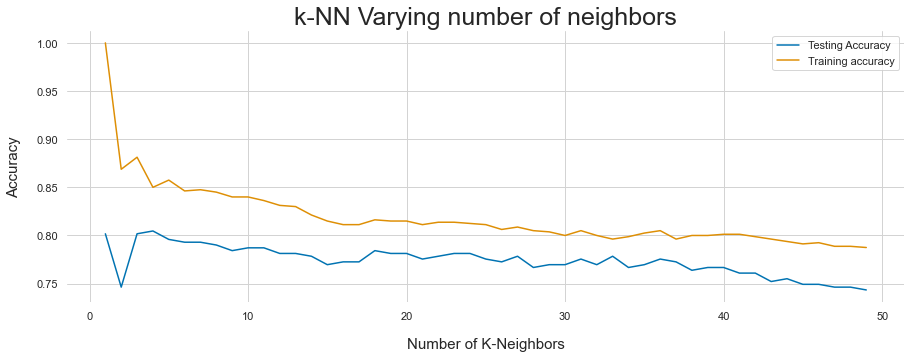

In [35]:
# Visualize Train/Test Performance
plt.figure(figsize=(15,5))
k = np.arange(1,50)
plt.title('k-NN Varying number of neighbors', size = 25)
plt.plot(k, test_accuracy, label='Testing Accuracy')
ax = plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of K-Neighbors', size = 15, labelpad = 15)
plt.ylabel('Accuracy', size = 15, labelpad = 15)
plt.grid(color = 'lightgrey')
plt.show()

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [36]:
knn = KNeighborsClassifier(n_neighbors=31,p=1,leaf_size=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))

[[  0  16   0]
 [  0 120   4]
 [  0  49 154]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  campaign_X       0.00      0.00      0.00        16
  campaign_Y       0.65      0.97      0.78       124
  campaign_Z       0.97      0.76      0.85       203

    accuracy                           0.80       343
   macro avg       0.54      0.58      0.54       343
weighted avg       0.81      0.80      0.79       343



Weighted average precision is 82% for the model.